# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# ensuring that the graphs  are displayed within the notebook without "calling" them specifically.

%matplotlib inline

In [3]:
# turning a project folder path into a string

path = r'/Users/mart/Documents/09-2022 IBRD  Statement of Loans'

# Importing database

df = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data', 'SoL.pkl'))

# set options to show all columns

pd.set_option('display.max_columns', None)

# check the first rows

df.head()

,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)
0,IBRD00010,EUROPE AND CENTRAL ASIA,France,CREDIT NATIONAL,France,NPL,Fully Repaid,4.25,250000000.0,0.0,0.0,250000000.0,38000.00,0.0,0.0,0.0,0.0,1947-05-09,1947-06-09,1947-12-31
5,IBRD00050,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,4.50,13500000.0,0.0,0.0,13500000.0,12167000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1954-12-31
6,IBRD00060,LATIN AMERICA AND CARIBBEAN,Chile,Ministry of Finance,Chile,NPL,Fully Repaid,3.75,2500000.0,0.0,0.0,2500000.0,755000.00,0.0,0.0,0.0,0.0,1948-03-25,1949-04-07,1950-01-01
13,IBRD00111,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.50,75000000.0,0.0,0.0,75000000.0,70971588.97,0.0,0.0,0.0,0.0,1949-01-27,1949-05-09,1953-12-31
14,IBRD00112,LATIN AMERICA AND CARIBBEAN,Brazil,Ministério da Fazenda,Brazil,NPL,Fully Repaid,4.25,15000000.0,0.0,0.0,15000000.0,15000000.00,0.0,0.0,0.0,0.0,1951-01-18,1951-04-10,1954-12-31


# Data checks

In [4]:
df.columns

Index(['Loan Number', 'Region', 'Country', 'Borrower', 'Guarantor',
       'Loan Type', 'Loan Status', 'Interest Rate',
       'Original Principal Amount', 'Cancelled Amount', 'Undisbursed Amount',
       'Disbursed Amount', 'Repaid to IBRD', 'Due to IBRD',
       'Exchange Adjustment', 'Borrowers Obligation', 'Loans Held',
       'Agreement Signing Date', 'Effective Date (Most Recent)',
       'Closed Date (Most Recent)'],
      dtype='object')

In [5]:
# checking for missing values

df.isnull().sum()

Loan Number                     0
Region                          0
Country                         0
Borrower                        0
Guarantor                       0
Loan Type                       0
Loan Status                     0
Interest Rate                   0
Original Principal Amount       0
Cancelled Amount                0
Undisbursed Amount              0
Disbursed Amount                0
Repaid to IBRD                  0
Due to IBRD                     0
Exchange Adjustment             0
Borrowers Obligation            0
Loans Held                      0
Agreement Signing Date          0
Effective Date (Most Recent)    0
Closed Date (Most Recent)       0
dtype: int64

In [6]:
# checking for duplicates

df_dups = df[df.duplicated()]
df_dups

,Loan Number,Region,Country,Borrower,Guarantor,Loan Type,Loan Status,Interest Rate,Original Principal Amount,Cancelled Amount,Undisbursed Amount,Disbursed Amount,Repaid to IBRD,Due to IBRD,Exchange Adjustment,Borrowers Obligation,Loans Held,Agreement Signing Date,Effective Date (Most Recent),Closed Date (Most Recent)


## Extreme values checks

/Users/mart/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Borrowers Obligation', ylabel='Density'>

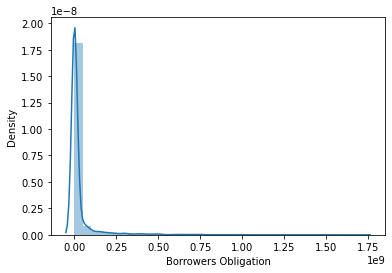

In [7]:
sns.distplot(df['Borrowers Obligation'], bins=35)

In [8]:
# Check the mean

df['Borrowers Obligation'].mean()

27344531.255204417

In [9]:
# Check the median

df['Borrowers Obligation'].median()

0.0

In [10]:
# Check the max

df['Borrowers Obligation'].max()

1708802751.37

# Data prep for regression analysis

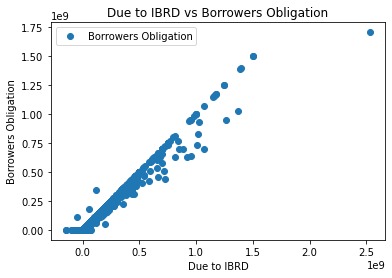

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'Due to IBRD', y='Borrowers Obligation',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Due to IBRD vs Borrowers Obligation')  
plt.xlabel('Due to IBRD')  
plt.ylabel('Borrowers Obligation')  
plt.show()

## Hypothesis

- If the disbursed and outstanding amount (Due to IBRD) is high, then The Borrower Obligation will be high as well.

## Reshaping the variables into NumPy arrays

In [12]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Due to IBRD'].values.reshape(-1,1)
y = df['Borrowers Obligation'].values.reshape(-1,1)

In [13]:
X

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [14]:
y

array([[ 0.  ],
       [ 0.  ],
       [ 0.  ],
       ...,
       [ 0.  ],
       [-0.01],
       [ 0.  ]])

In [15]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Regression analysis

In [16]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [17]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

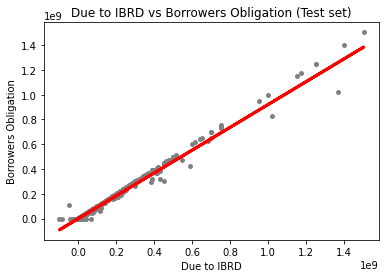

In [19]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Due to IBRD vs Borrowers Obligation (Test set)')
plot_test.xlabel('Due to IBRD')
plot_test.ylabel('Borrowers Obligation')
plot_test.show()

- Although not completely covering all of the data points, the red regression line is close to the data points that are not covered by the line.

In [20]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [21]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91996808]]
Mean squared error:  125067031591153.61
R2 score:  0.9888486728838118


- The slope is showing us that as X (the Due to IBRD) rises, y  (the Borrowers Obligation ) rises as well at a degree of 0.9199. 

- The MSE is quite large at 125 067 031 591 153.61, which means that regression is not the best model to represent this data and can’t accurately predict the influence of the Due to IBRD on the Borrowers Obligation.

- The R2 score of 0.98 means that the model explains the variance in the data really well.

In [22]:
y_predicted

array([[1158364.34309244],
       [1158364.34309244],
       [1158364.34309244],
       ...,
       [1158364.34309244],
       [1158364.34309244],
       [1158364.34309244]])

In [23]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0.000000e+00,1.158364e+06
1,0.000000e+00,1.158364e+06
2,1.000000e-02,1.158364e+06
3,1.999727e+06,2.998049e+06
4,0.000000e+00,1.158364e+06
5,0.000000e+00,1.158364e+06
6,0.000000e+00,1.158364e+06
7,3.662720e+08,3.381169e+08
8,0.000000e+00,1.158364e+06
9,3.599944e+07,3.427670e+07


## Compare how the regression fits the training set

In [24]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91996808]]
Mean squared error:  230630578609447.1
R2 score:  0.9781679217011757


-  The coefficient is positive, the MSE is significantly high, and the R2 score is high, with all the values being almost identical compared to the model ones.

- It turns out that the hypothesis, “if the Due to the IBRD is high, the Borrowers Obligation will be high as well”, is only partially true.

- While the Borrowers Obligation is becoming higher with the increase of the  disbursed and outstanding amount (Due to the IBRD), it's not the only factor affecting it. 

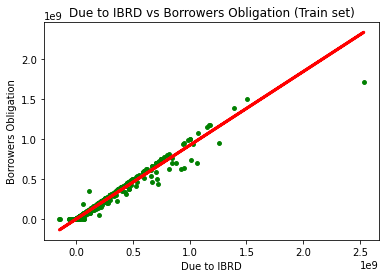

In [27]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Due to IBRD vs Borrowers Obligation (Train set)')
plot_test.xlabel('Due to IBRD')
plot_test.ylabel('Borrowers Obligation')
plot_test.show()

# Bonus: Performance improvement after removing outliers

In [28]:
# removing zeroes from the the "Borrowers Obligation" variable 

df_test = df[(df['Borrowers Obligation'] > 0) & (df['Borrowers Obligation'] <= 50000000)] 

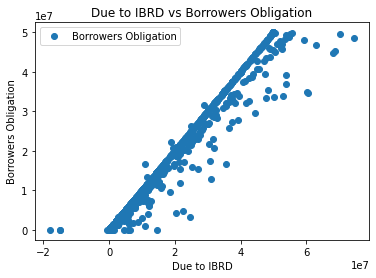

In [29]:
# See how the scatterplot looks without outliers

df_test.plot(x = 'Due to IBRD', y='Borrowers Obligation', style='o')  
plt.title('Due to IBRD vs Borrowers Obligation')  
plt.xlabel('Due to IBRD')  
plt.ylabel('Borrowers Obligation')  
plt.show()

In [30]:
# Reshape again

X_2 = df_test['Due to IBRD'].values.reshape(-1,1)
y_2 = df_test['Borrowers Obligation'].values.reshape(-1,1)

In [31]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [32]:
# Run and fit the regression

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [33]:
# Predict

y_predicted_2 = regression.predict(X_test_2)

In [34]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [35]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.91449485]]
Mean squared error:  5942703127209.638
R2 score:  0.9734400063337663


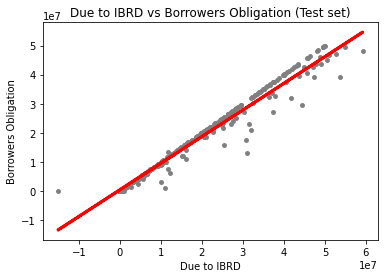

In [36]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Due to IBRD vs Borrowers Obligation (Test set)')
plot_test.xlabel('Due to IBRD')
plot_test.ylabel('Borrowers Obligation')
plot_test.show()

In [37]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,4772342.14,5.518850e+06
1,25228223.64,2.636365e+07
2,20642067.20,1.931436e+07
3,45737437.55,4.226395e+07
4,40202721.77,3.720248e+07
5,1837490.06,2.117670e+06
6,20550165.33,1.923032e+07
7,11651808.17,1.109281e+07
8,13499800.00,1.278279e+07
9,14381887.89,1.358946e+07


- It appears that deleting zeros and outliers didn't have a big impact on the model's accuracy. 

- I believe that we are distorting reality by excluding extreme values.